# Predicting the Stock Market Trends with RNN and LTSM

## LTSM

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model


### Importing Dataset

In [2]:
fb_complete_data = pd.read_csv('data/fb_train.csv')
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.366852,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.108192,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.069290,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.069290,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.097137,23961000


In [3]:
fb_trainging_processed = fb_complete_data[["Open"]].values

In [4]:
scalar = MinMaxScaler(feature_range=(0,1))

fb_training_scaled = scalar.fit_transform(fb_trainging_processed)

In [5]:
len(fb_training_scaled)

1257

In [6]:
fb_training_features = []
fb_training_labels = []

for i in range(60,len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i,0])
    fb_training_labels.append(fb_training_scaled[i,0])

In [7]:
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [8]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Training the Model

In [10]:
input_layer = Input(shape=(X_train.shape[1],1))
ltsm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(ltsm1)
ltsm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(ltsm2)
ltsm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(ltsm3)
ltsm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(ltsm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

Creating the LTSM model

In [11]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [12]:
model_history = model.fit(X_train, y_train, epochs=100, verbose = 1, batch_size=32)

Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.1508
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0096
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0063
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0063
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0056
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0058
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0060
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0049
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0066
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0048
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0061
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0045


This is how the model is trained. Next the model will be tested using the test data.

### Testing the Model

In [13]:
fb_testing_complete_data = pd.read_csv('data/fb_test.csv')
fb_testing_processed = fb_testing_complete_data[["Open"]].values

In [14]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [15]:
test_inputs = fb_all_data[len(fb_all_data) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [16]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scalar.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [17]:
fb_test_features = []
for i in range(60,80):
    fb_test_features.append(test_inputs[i-60:i,0])

In [18]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


This shows the shape of the feature set.

In [19]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


This converts the data to a 3D shape to input into Keras.

In [20]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


In [21]:
y_pred = scalar.inverse_transform(y_pred)

Converts the scaled data back into the original scale.

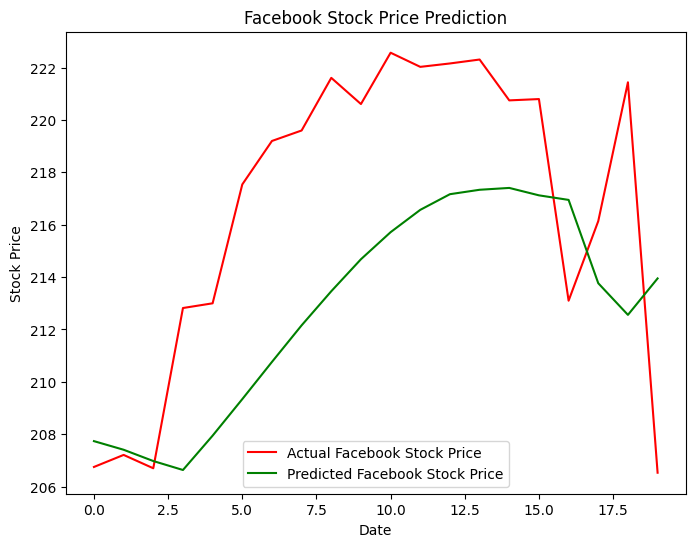

In [22]:
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facebook Stock Price')
plt.plot(y_pred, color='green', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The plot is able to partially able to capture the trends of the future opening stock prices.